<center>
    <h1><font color=darkred> Tsinghua University </font></h1>
    <h1><font color=darkred> Department of Industrial Engineering </font></h1>
    <h3> Machine Learning and Big-data (30160253) </h3>
    <h4> Fall 2025 </h4>
    <hr>
    <h1> Homework 9: Convolutional Neural Networks </h1>
    <h3></h3>
</center>

### 1. Problem

Consider the classification problem of the CIFAR10 dataset.

1) Data processing: We load the CIFAR10 dataset.

2) Model training and prediction: Please develop a CNN based on PyTorch architecture and train it. Calculate the accuracy to evaluate the performance of these models.

3) Visualizing results: (1) Confusion Matrix. (2) The accuracy. 

### 2. Data processing

In [1]:
# Load packages
from torchvision.datasets import CIFAR10 # pip install torchvision
from torchvision.transforms import Compose,ToTensor,Normalize
from torch.utils.data import DataLoader
import torchvision.utils as vutils
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import os
import torch
import numpy as np
import matplotlib.pyplot as plt  

torch.manual_seed(42)
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

print(torch.cuda.is_available())

False


In [ ]:
# Set the batch size and the test size
BATCH_SIZE = 500
TEST_BATCH_SIZE = 500

#Prepare the dataset
def get_dataloader(Train=True, batch=BATCH_SIZE):
    
    transform_fn = Compose(
    [ToTensor(),  # 将图像转换为张量
     Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 对图像进行标准化处理
    ])
    
    dataset = CIFAR10(root = './homework_data', train = Train, transform = transform_fn)  # download=True
    data_loader = DataLoader(dataset, batch_size = batch, shuffle = True)
    
    return data_loader

train_loader = get_dataloader(Train = True, batch = BATCH_SIZE)  #Get Train Data Loader
test_loader = get_dataloader(Train = False, batch = TEST_BATCH_SIZE)  #Get Test Data Loader

In [3]:
# View the data size
train_data = CIFAR10(root = './data',train = True, transform = ToTensor())
test_data = CIFAR10(root = './data',train = False, transform = ToTensor())

print(train_data)
print(test_data)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


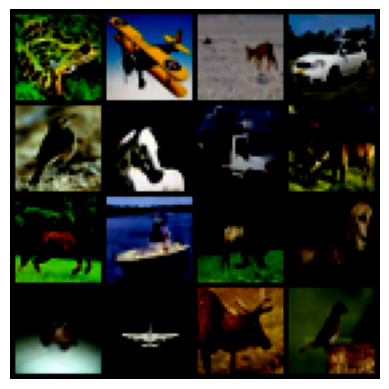

In [4]:
# View 16 images in the dataset
dataiter = iter(train_loader)
images_all, labels_all = next(dataiter)  
images = images_all[:16]
labels = labels_all[:16]
imshow_batch = vutils.make_grid(images, nrow=4, padding=2)
imshow_batch = imshow_batch.permute(1, 2, 0).numpy()
imshow_batch = imshow_batch * 255.0
imshow_batch = np.clip(imshow_batch, 0, 255).astype(np.uint8)

plt.imshow(imshow_batch)
plt.axis('off')  # 不显示坐标轴
plt.show()

### 3. Model training and prediction

Fill in the blanks.

The "in_channels" of the first layer is 3. That is, the inputs are 3-channels RGB images.

In [5]:
class CIFAR10_CNN(nn.Module):
    def __init__(self):
        super(CIFAR10_CNN, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, padding=2, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
    
        self.FC1 = nn.Linear(32 * 8 * 8, 256)
        self.FC2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.FC1(x))
        output = self.FC2(x)
        return output

In [6]:
Model = CIFAR10_CNN().to(device)

print(Model)

print('# Model parameters:', sum(param.numel() for param in Model.parameters()))

CIFAR10_CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (FC1): Linear(in_features=2048, out_features=256, bias=True)
  (FC2): Linear(in_features=256, out_features=10, bias=True)
)
# Model parameters: 541162


In [7]:
Criterion = nn.CrossEntropyLoss()
Optimizer = Adam(Model.parameters(),lr = 0.0001)

Fill in the blanks.
Set "EPOCH" to 10.

In [13]:
EPOCH = 30
train_loss = []
train_acc = []
test_loss = []
test_acc  = []

for epoch in range(EPOCH):
    
    train_loss_sum, test_loss_sum, train_num, test_num, train_i, test_i = 0.0, 0.0, 0, 0, 0, 0
    train_acc_sum,test_acc_sum = 0, 0
    TEST_acc_sum = 0
    
    for i_1, train_data in enumerate(train_loader):
        
        # Fill in the blanks
        inputs, labels = train_data
        inputs = inputs.type(torch.FloatTensor)
        inputs = inputs.to(device)

        labels = labels.long()
        labels = labels.to(device)

        Model.train()
        pre_labs = Model(inputs)
        loss = Criterion(pre_labs, labels)
        Optimizer.zero_grad()
        loss.backward()
        Optimizer.step()

        train_loss_sum += loss.item()
        train_acc_sum += (pre_labs.argmax(dim=1) == labels).sum().item()
        train_num += labels.shape[0]
        train_i += 1

    pred_list = []
    target_list = []
    for i_2, data in enumerate(test_loader):
        with torch.no_grad():

            test_data, test_lab = data  
            test_data = test_data.type(torch.FloatTensor)
            test_data = test_data.to(device)
            
            test_lab = test_lab.long()
            test_lab = test_lab.to(device)
            
            target_list.append(test_lab.view(-1).tolist())

            # Fill in the blanks
            Model.eval()
            pre_test = Model(test_data)
            pred_lab = pre_test.argmax(dim=1)
            
            pred_list.append(pred_lab.view(-1).tolist())
            
            t_loss = Criterion(pre_test, test_lab)

            test_loss_sum += t_loss    
            test_acc_sum += (pred_lab == test_lab).sum().item()
            test_num += test_lab.shape[0]                    
            test_i += 1
       
    Train_Loss = train_loss_sum/train_i
    Test_Loss = test_loss_sum/test_i
    Train_ACC = train_acc_sum/train_num
    Test_ACC = test_acc_sum/test_num

    print('Epoch:%d, train_loss:%.5f, train_acc:%.5f, test_loss:%.5f, test_acc:%.5f' % 
          (epoch, Train_Loss, Train_ACC, Test_Loss, Test_ACC))
    print('-----------------------------------------------')

    train_loss.append(Train_Loss)            
    train_acc.append(Train_ACC) 
    test_loss.append(Test_Loss) 
    test_acc.append(Test_ACC)       

print("Finished Training")

Epoch:0, train_loss:1.25634, train_acc:0.55892, test_loss:1.26028, test_acc:0.55420
-----------------------------------------------
Epoch:1, train_loss:1.23454, train_acc:0.56656, test_loss:1.24724, test_acc:0.55810
-----------------------------------------------
Epoch:2, train_loss:1.21522, train_acc:0.57410, test_loss:1.22622, test_acc:0.56280
-----------------------------------------------
Epoch:3, train_loss:1.19396, train_acc:0.58050, test_loss:1.21346, test_acc:0.56630
-----------------------------------------------
Epoch:4, train_loss:1.17607, train_acc:0.58722, test_loss:1.20003, test_acc:0.57130
-----------------------------------------------
Epoch:5, train_loss:1.15852, train_acc:0.59380, test_loss:1.18536, test_acc:0.57990
-----------------------------------------------
Epoch:6, train_loss:1.14011, train_acc:0.60034, test_loss:1.17443, test_acc:0.58530
-----------------------------------------------
Epoch:7, train_loss:1.12391, train_acc:0.60630, test_loss:1.14687, test_acc:

In [14]:
y_test = np.array(target_list).flatten()
y_pred = np.array(pred_list).flatten()
print('train_acc:')
print(train_acc)
print('----------------------------------------')

print('test_acc:')
print(test_acc)
print('----------------------------------------')

train_acc:
[0.55892, 0.56656, 0.5741, 0.5805, 0.58722, 0.5938, 0.60034, 0.6063, 0.61236, 0.61912, 0.62092, 0.62638, 0.63486, 0.63768, 0.6426, 0.64686, 0.64972, 0.65554, 0.658, 0.66316, 0.66558, 0.66966, 0.67176, 0.67542, 0.67772, 0.68258, 0.6859, 0.68666, 0.68814, 0.69316]
----------------------------------------
test_acc:
[0.5542, 0.5581, 0.5628, 0.5663, 0.5713, 0.5799, 0.5853, 0.5922, 0.5941, 0.5948, 0.6076, 0.6077, 0.6115, 0.6186, 0.6141, 0.6223, 0.6238, 0.6229, 0.6295, 0.6339, 0.6363, 0.6372, 0.6391, 0.637, 0.6361, 0.6407, 0.6466, 0.6469, 0.6427, 0.6509]
----------------------------------------


### 3. Visualizing results

### 3.1 Confusion Matrix

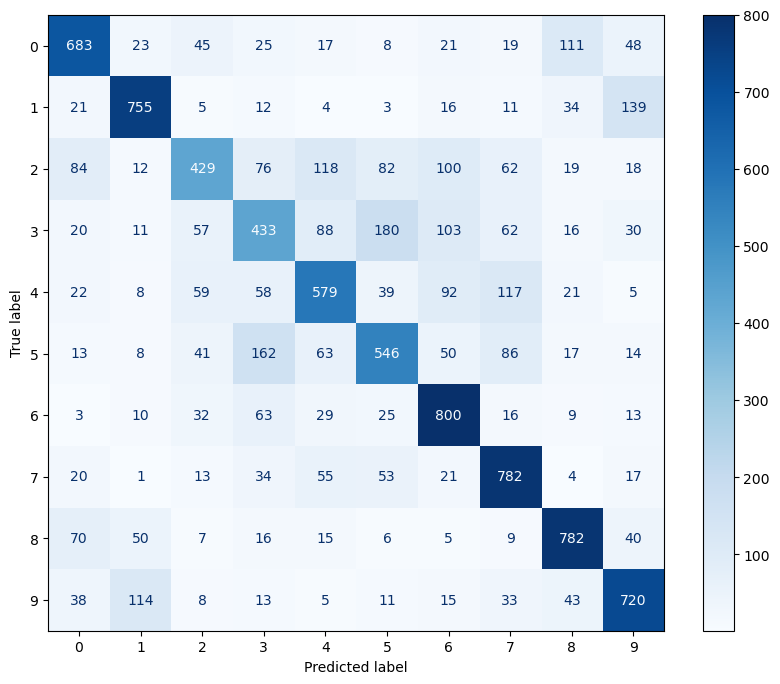

In [15]:
# Load Python packages for Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix
fig,ax = plt.subplots(figsize = (10,8))
cm = confusion_matrix(y_test, y_pred, labels = np.arange(0,10,1))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=np.arange(0,10,1)
)
disp.plot(ax=ax, cmap = 'Blues')
plt.show()


### 3.2 Plot the accuracy

Text(0.5, 0, 'Iteration')

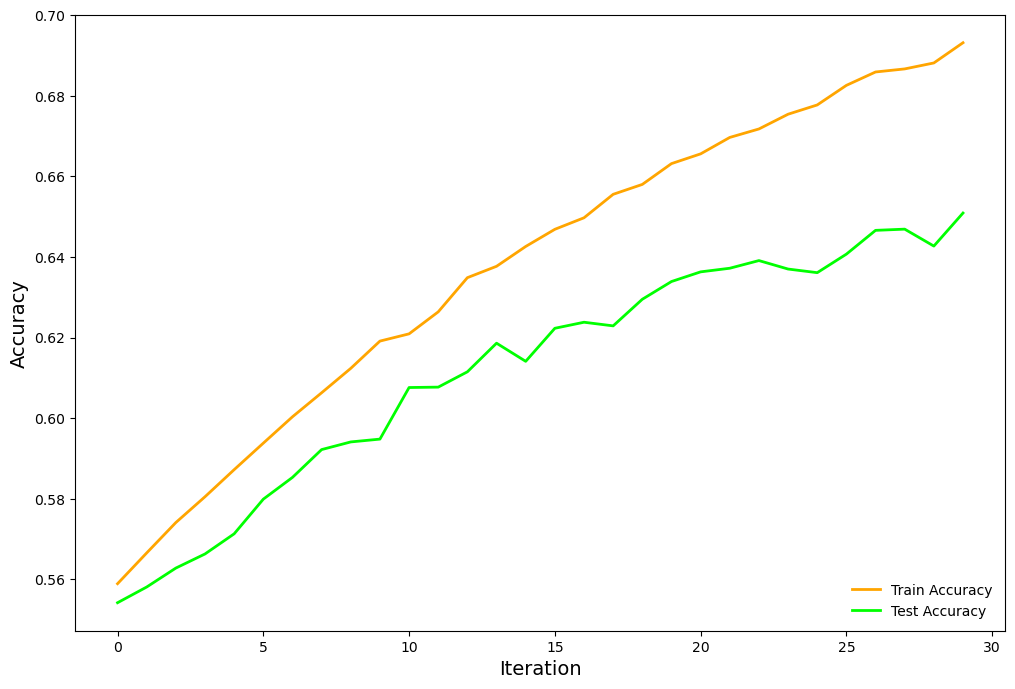

In [16]:
X_epoch = np.arange(EPOCH)

fig = plt.figure(figsize=(12, 8))
sub = fig.add_subplot(111)
sub.plot(X_epoch, train_acc, c='orange', label='Train Accuracy',linewidth=2)
sub.plot(X_epoch, test_acc, c='lime', label='Test Accuracy',linewidth=2)

plt.legend(loc=4, edgecolor='w')
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('Iteration',fontsize=14)